# 相関行列

In [1]:
# 数値計算やデータフレーム操作に関するライブラリをインポートする
import numpy as np
import pandas as pd
from pandas.tools import plotting # 高度なプロットを行うツールのインポート

In [2]:
# 「#」（シャープ）以降の文字はプログラムに影響しません。
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [3]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
# import urllib # Python 2 の場合
import urllib.request # Python 3 の場合

In [11]:
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/USArrests.txt'
# 指定したURLからリソースをダウンロードし、名前をつける。
# urllib.urlretrieve(url, 'USArrests.txt') # Python 2 の場合
urllib.request.urlretrieve(url, 'USArrests.txt') # Python 3 の場合

('USArrests.txt', <http.client.HTTPMessage at 0x1077fb588>)

In [12]:
# データの読み込み
df = pd.read_csv('USArrests.txt', sep='\t', index_col=0) 

In [13]:
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [14]:
# 相関行列
pd.DataFrame(np.corrcoef(df.dropna().iloc[:, :4].T.as_matrix().tolist()), 
             columns=df.columns[:4], index=df.columns[:4])

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


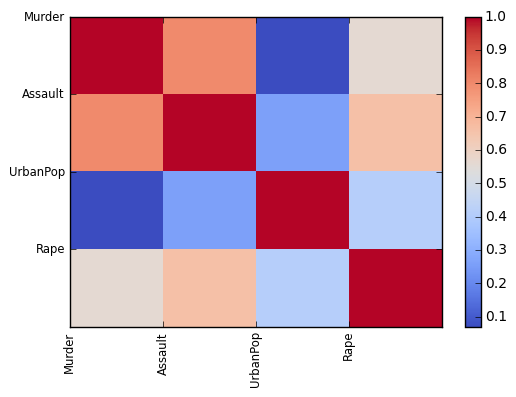

In [17]:
# 相関行列をカラーマップで見やすく。
corrcoef = np.corrcoef(df.dropna().iloc[:, :4].T.as_matrix().tolist())
fig = plt.figure()
ax = fig.add_subplot(111)
#plt.pcolor(corrcoef, cmap=plt.cm.Blues)
plt.pcolor(corrcoef, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.gca().get_yaxis().set_major_locator(ticker.MaxNLocator(integer=True))
xticks = ax.set_xticks(range(len(corrcoef)))
xlabels = ax.set_xticklabels(list(df.columns[:4]), rotation =90,fontsize ="small")
yticks = ax.set_yticks(range(len(corrcoef)))
ylabels = ax.set_yticklabels(list(df.columns[:4]), rotation =0,fontsize ="small")
plt.xlim([0, len(corrcoef)])
plt.ylim([len(corrcoef),0])
plt.show()

In [16]:
# 相関行列
pd.DataFrame(np.corrcoef(df.dropna().iloc[:, :4].as_matrix().tolist()), 
             columns=df.index, index=df.index)

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Alabama,1.000000,0.990925,0.998570,0.999619,0.993813,0.986015,0.874561,0.996236,0.999886,0.999835,...,0.953025,0.998127,0.987434,0.892068,0.894379,0.985684,0.956765,0.967597,0.587533,0.989115
Alaska,0.990925,1.000000,0.989696,0.990656,0.983846,0.975585,0.821791,0.979215,0.992645,0.989701,...,0.921407,0.987917,0.965815,0.852015,0.858135,0.964567,0.932117,0.934900,0.510588,0.967495
Arizona,0.998570,0.989696,1.000000,0.999665,0.998306,0.993477,0.891654,0.998104,0.998822,0.999269,...,0.964788,0.999925,0.992673,0.910998,0.913936,0.991748,0.969420,0.975539,0.618497,0.993616
Arkansas,0.999619,0.990656,0.999665,1.000000,0.996486,0.990217,0.883667,0.997551,0.999695,0.999899,...,0.959422,0.999411,0.990483,0.902137,0.904774,0.989158,0.963629,0.972027,0.603679,0.991784
California,0.993813,0.983846,0.998306,0.996486,1.000000,0.998424,0.910517,0.997492,0.994323,0.995520,...,0.976054,0.998726,0.996056,0.930823,0.934142,0.995988,0.981112,0.982723,0.655165,0.996200
Colorado,0.986015,0.975585,0.993477,0.990217,0.998424,1.000000,0.924538,0.993462,0.986832,0.988663,...,0.983168,0.994335,0.995766,0.946119,0.949920,0.996548,0.988845,0.985818,0.686470,0.995134
Connecticut,0.874561,0.821791,0.891654,0.883667,0.910517,0.924538,1.000000,0.913305,0.872198,0.882813,...,0.978501,0.897102,0.939650,0.994737,0.991141,0.942304,0.969821,0.968629,0.905916,0.936243
Delaware,0.996236,0.979215,0.998104,0.997551,0.997492,0.993462,0.913305,1.000000,0.995722,0.997574,...,0.975379,0.998705,0.997325,0.927101,0.928409,0.996333,0.976987,0.985835,0.655424,0.998124
Florida,0.999886,0.992645,0.998822,0.999695,0.994323,0.986832,0.872198,0.995722,1.000000,0.999719,...,0.952209,0.998290,0.986862,0.891220,0.893990,0.985260,0.956760,0.966224,0.584155,0.988454
Georgia,0.999835,0.989701,0.999269,0.999899,0.995520,0.988663,0.882813,0.997574,0.999719,1.000000,...,0.958312,0.999022,0.990093,0.900092,0.902359,0.988565,0.961894,0.971776,0.601616,0.991547


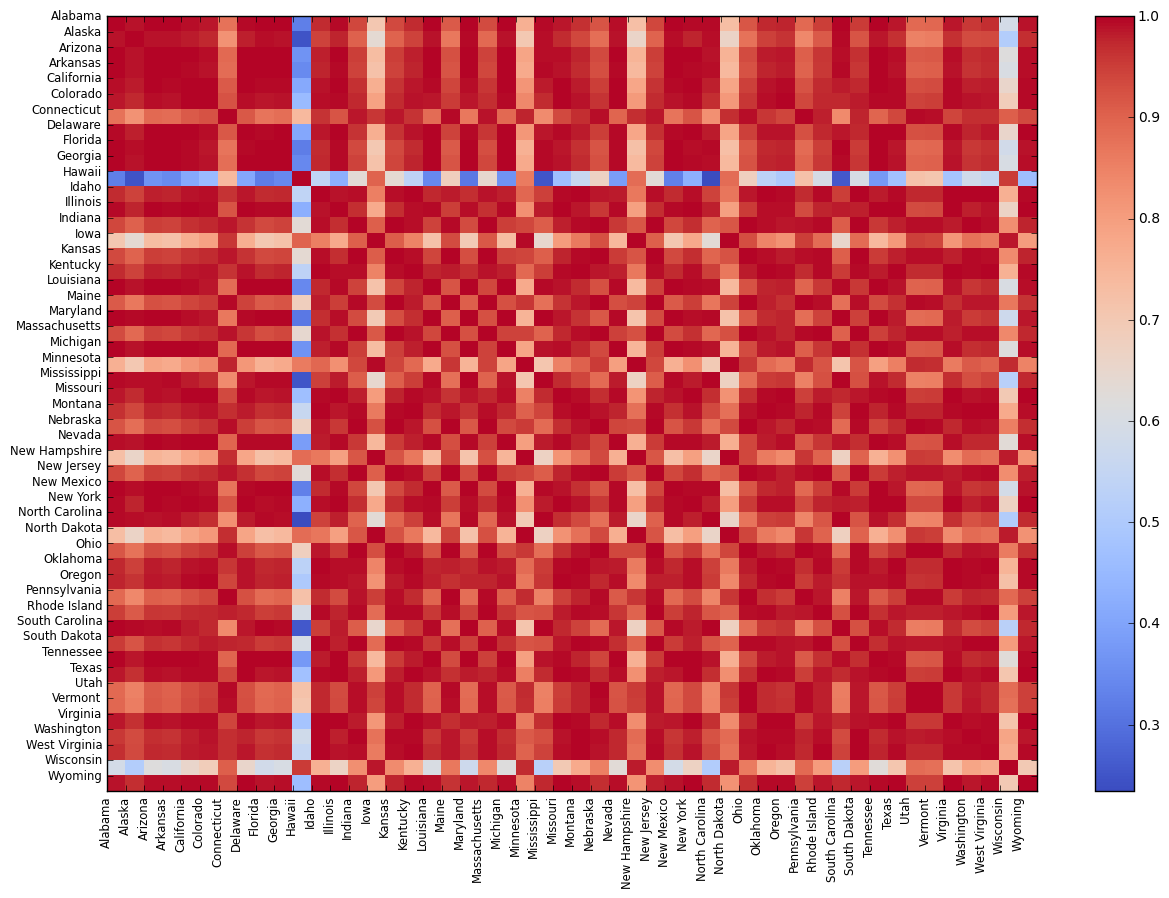

In [18]:
# 相関行列をカラーマップで見やすく。
corrcoef = np.corrcoef(df.dropna().iloc[:, :4].as_matrix().tolist())
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
#plt.pcolor(corrcoef, cmap=plt.cm.Blues)
plt.pcolor(corrcoef, cmap=plt.cm.coolwarm)
plt.colorbar()
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.gca().get_yaxis().set_major_locator(ticker.MaxNLocator(integer=True))
xticks = ax.set_xticks(range(len(corrcoef)))
xlabels = ax.set_xticklabels(list(df.index), rotation =90,fontsize ="small")
yticks = ax.set_yticks(range(len(corrcoef)))
ylabels = ax.set_yticklabels(list(df.index), rotation =0,fontsize ="small")
plt.xlim([0, len(corrcoef)])
plt.ylim([len(corrcoef),0])
plt.show()